<a href="https://colab.research.google.com/github/EdioHub/churn-decision-tree/blob/main/modelo_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# **MODELO DE CHURN**


##**1. Introdução**

Empresas que têm a cultura data driven maximizam seus resultados através de informações extraídas dos dados. Ou seja, utilizam os dados para extrair informações e usam as informações para tomar decisões.

"Seus clientes mais insatisfeitos são sua maior fonte de aprendizado (Bill Gates)."

A taxa de retenção de clientes é um bom indicativo de qualidade do seu produto/serviço. Se o produto/serviço não é de qualidade, você irá observar uma porcentagem alta de clientes deixando de comprar ou trocando de empresa, ou seja, uma alta taxa de Churn.

Mas quais são as características que leva um cliente a dar o Churn?

Na parte I, abordamos o entendimento do problema de Churn e estabelecemos o objetivo, identificar o perfil e prever os clientes em risco de Churn.

Agora nessa parte II daremos continuidade a análise e para isso utilizaremos um conjunto de dados de uma agência bancária.



*   Entendimento do Problema
*   Obtenção dos dados

*   Análise Exploratória e Visualização dos dados
*   Pré-processamento

*   Modelos de Machine Learning
*   Avaliação do modelo












#2.**Coleta de dados**

In [ ]:
import pandas as pd


In [3]:
#para uso de meu drive no git arqivo separado
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df= pd.read_csv('/content/drive/MyDrive/Projetos git/02-Churn/Churn_Modelling.csv')
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


## **3. EDA**

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


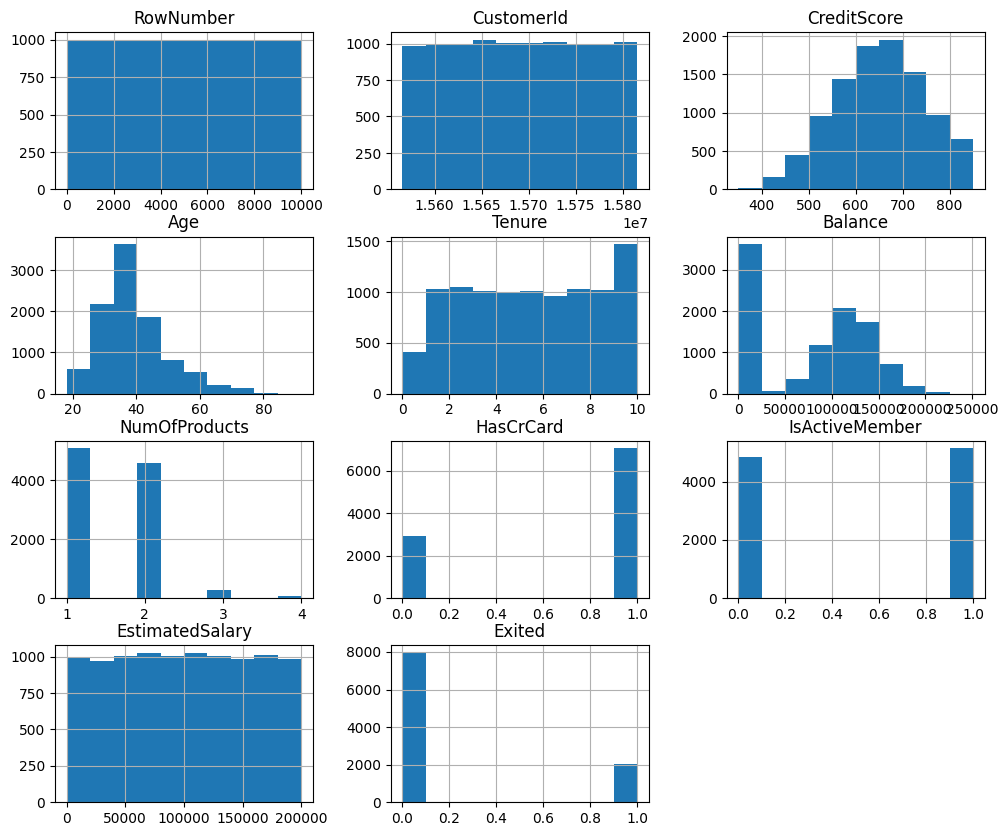

In [7]:
df.hist(figsize=(12,10));


## **D.Visualização de Dados - Qual o perfil de clientes que cancelaram o contrato (Churn)?**

In [8]:
import numpy as np #  pacote algebra linear;
import seaborn as sns #visualização de dados;


In [9]:
myred='#CD5C5C'
myblue='#6495ED'
mygreen='#90EE90'
cols= [myred, myblue,mygreen]

In [10]:
# porcentagem de clientes que sairam do banco
df['Exited'].sum()/df['Exited'].count()

0.2037

###**Variáveis Categóricas**

 Primeiro vamos analisar as variáveis categóricas em relação a variável de saída (Exited). Utilizaremos gráficos de barras para esse fim.

* **Variável Sexo**

In [11]:
#renomeando as categorias
df['Gender']=df['Gender'].replace(['Female','Male'],['Feminino','Masculino'])

In [12]:
df_plot = df.groupby ('Gender'). Exited.mean (). reset_index () 
df_plot

,Gender,Exited
0,Feminino,0.250715
1,Masculino,0.164559


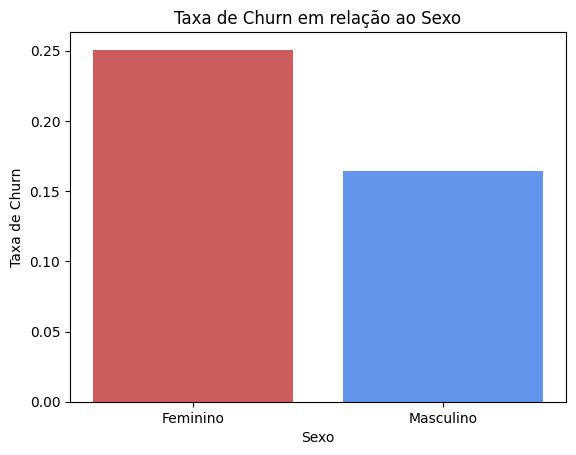

In [13]:
#Sexo em relação a variável churn
from matplotlib import pyplot as plt
x =df_plot['Gender']
y=df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao Sexo');
plt.xlabel('Sexo');
plt.ylabel('Taxa de Churn');

Observa-se que as mulheres têm um risco maior de Churn do que os homens. 

* **Variável País**

In [14]:
df['Geography'] = df['Geography'].replace(['France','Germany','Spain'],['França','Alemanha','Espanha'])
df_plot = df.groupby ('Geography'). Exited.mean (). reset_index () 
df_plot 

,Geography,Exited
0,Alemanha,0.324432
1,Espanha,0.166734
2,França,0.161548


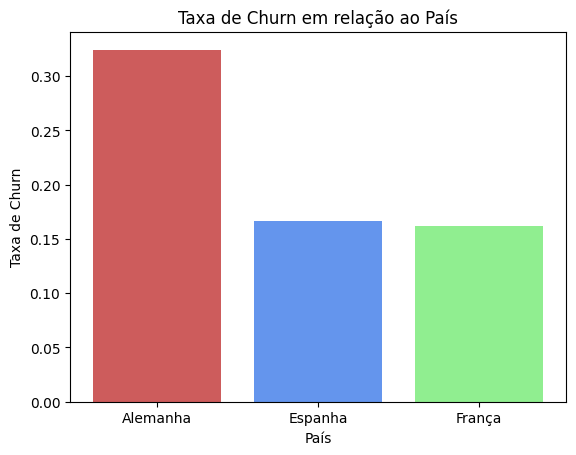

In [15]:
#País em relação a variável churn
x = df_plot['Geography']
y = df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação ao País');
plt.xlabel('País');
plt.ylabel('Taxa de Churn');

Em relação a variável país, observa-se que a porcentagem de Churn na Alemanha é bastante elevada, onde 32% dos clientes encerraram a conta no banco. Espanha e França têm uma taxa de Churn parecidas em torno de 16%.

**Variável Cartão de Crédito**

In [16]:
df['HasCrCard']=df['HasCrCard'].replace([0,1],['Não','Sim'])


In [17]:
df_plot = df.groupby ('HasCrCard'). Exited.mean (). reset_index () 
df_plot

,HasCrCard,Exited
0,Não,0.208149
1,Sim,0.201843


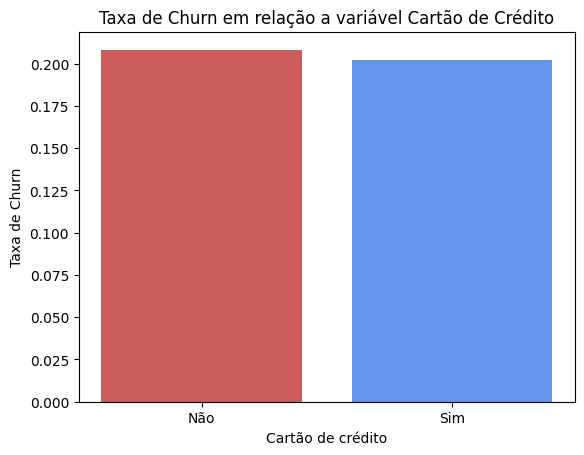

In [18]:
#Cartão de crédito em relação a variável churn
x = df_plot['HasCrCard']
y = df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a variável Cartão de Crédito');
plt.xlabel('Cartão de crédito');
plt.ylabel('Taxa de Churn');

Observe que o cliente ter ou não cartão de crédito parece não influenciar no Churn.

* **Variável Membro Ativo**

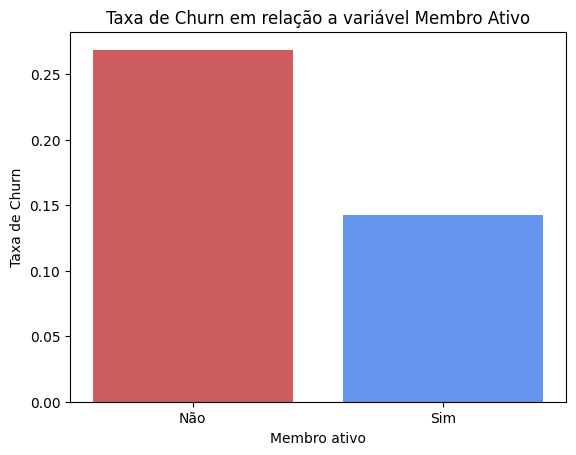

In [19]:
df['IsActiveMember'] = df['IsActiveMember'].replace([0,1],['Não','Sim'])
df_plot = df.groupby ('IsActiveMember'). Exited.mean (). reset_index () 
#Membro ativo em relação a variável churn
x = df_plot['IsActiveMember']
y = df_plot['Exited']
plt.bar(x,y,color=cols);
plt.title('Taxa de Churn em relação a variável Membro Ativo');
plt.xlabel('Membro ativo');
plt.ylabel('Taxa de Churn');

O Churn entre os clientes que não são ativos é maior do que os clientes ativos, tendo uma diferença de aproximadamente 12%.

Variáveis numéricas
Para as variáveis numéricas utilizaremos variáveis de barras para variáveis discretas e gráfico de dispersão e box-plot para as variáveis contínuas. Também analisaremos a matriz de correlação para ver a correlação entre as variáveis.

Selecionamos, primeiramente, apenas as variáveis numéricas

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

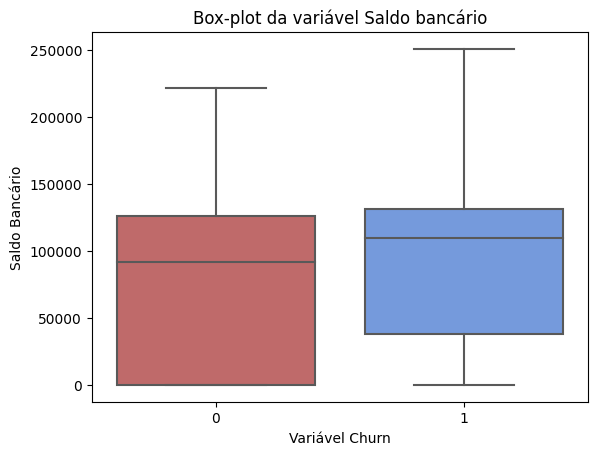

In [20]:
#box-plot salto bancario em relação ao Churn
cols = [myred, myblue,mygreen]
sns.boxplot(x = "Exited", y="Balance", data=df,palette=cols);
plt.title('Box-plot da variável Saldo bancário');
plt.xlabel('Variável Churn');
plt.ylabel('Saldo Bancário');
df.groupby(['Exited'])['Balance'].mean()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64

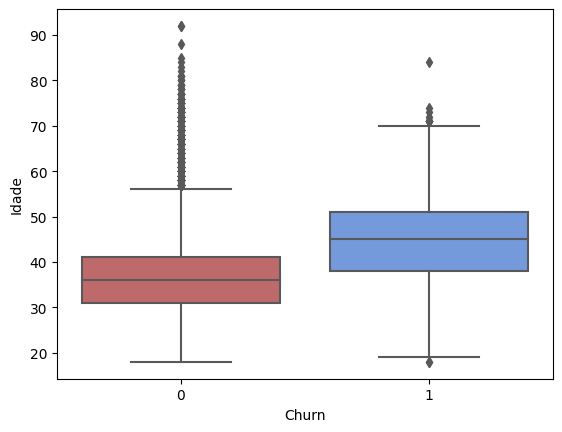

In [21]:
#box-plot Idade pelo Churn
sns.boxplot(x="Exited", y="Age" , data=df,palette=cols);
plt.xlabel('Churn');
plt.ylabel('Idade');
df.groupby(['Exited'])['Age'].mean()

Analisando o histórico de clientes, observamos algumas características entre os clientes que cancelaram o serviço.

Observa-se que clientes da Alemanha, do sexo feminino, que não são membro ativo, com alto número de produtos, score de crédito baixo, com saldo bancário elevado e com idade entre 50 e 60 anos têm uma taxa de Churn maior que os outros clientes.

Assim, clientes com essas características possui um risco maior de cancelarem o serviço bancário.

## **4. PRÉ PROCESSAMENTO**

Alguns algoritmos de machine learning não aceitam variáveis categóricas e por isso precisamos utilizar técnicas para converter as classes em números.

Ou seja, convertemos as colunas categóricas em numéricas simplesmente atribuindo números inteiros a classes distintas.

Para as variáveis categóricas com apenas duas classes utilizaremos a função Label Encoder para converte colunas categóricas em numéricas simplesmente atribuindo números inteiros a valores distintos.

Por exemplo, a coluna sexo tem dois valores: Feminino e Masculino . Após aplicar a função, os valores serão transformados em 1 e 0.

In [22]:
df1 = df.drop(columns = ['RowNumber','CustomerId','Surname'])
df1


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,França,Feminino,42,2,0.00,1,Sim,Sim,101348.88,1
1,608,Espanha,Feminino,41,1,83807.86,1,Não,Sim,112542.58,0
2,502,França,Feminino,42,8,159660.80,3,Sim,Não,113931.57,1
3,699,França,Feminino,39,1,0.00,2,Não,Não,93826.63,0
4,850,Espanha,Feminino,43,2,125510.82,1,Sim,Sim,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Masculino,39,5,0.00,2,Sim,Não,96270.64,0
9996,516,França,Masculino,35,10,57369.61,1,Sim,Sim,101699.77,0
9997,709,França,Feminino,36,7,0.00,1,Não,Sim,42085.58,1
9998,772,Alemanha,Masculino,42,3,75075.31,2,Sim,Não,92888.52,1


##**Dados faltantes**

In [23]:
#Contato número de observações faltantes no dataset para cada variável
df2 = df.isnull().sum()
df2

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## **5.MODELO**

In [24]:
y = df1['Exited']
X = df1
X = df1.drop('Exited',axis = 1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,França,Feminino,42,2,0.00,1,Sim,Sim,101348.88
1,608,Espanha,Feminino,41,1,83807.86,1,Não,Sim,112542.58
2,502,França,Feminino,42,8,159660.80,3,Sim,Não,113931.57
3,699,França,Feminino,39,1,0.00,2,Não,Não,93826.63
4,850,Espanha,Feminino,43,2,125510.82,1,Sim,Sim,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,França,Masculino,39,5,0.00,2,Sim,Não,96270.64
9996,516,França,Masculino,35,10,57369.61,1,Sim,Sim,101699.77
9997,709,França,Feminino,36,7,0.00,1,Não,Sim,42085.58
9998,772,Alemanha,Masculino,42,3,75075.31,2,Sim,Não,92888.52


In [25]:
#Variáveis Continuas
x_cont=['CreditScore','Balance','Age','EstimatedSalary','Tenure']
x_cont

['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure']

In [26]:
#Variáveis Categóricas
x_cat = list(set(X)-set(x_cont))
x_cat
x_dummies = X[x_cat]
x_dummies

,Geography,NumOfProducts,IsActiveMember,Gender,HasCrCard
0,França,1,Sim,Feminino,Sim
1,Espanha,1,Sim,Feminino,Não
2,França,3,Não,Feminino,Sim
3,França,2,Não,Feminino,Não
4,Espanha,1,Sim,Feminino,Sim
...,...,...,...,...,...
9995,França,2,Não,Masculino,Sim
9996,França,1,Sim,Masculino,Sim
9997,França,1,Sim,Feminino,Não
9998,Alemanha,2,Não,Masculino,Sim


In [28]:
##Substituindo a variável sexo para 0 e 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender']) 
X.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,França,0,42,2,0.00,1,Sim,Sim,101348.88
1,608,Espanha,0,41,1,83807.86,1,Não,Sim,112542.58
2,502,França,0,42,8,159660.80,3,Sim,Não,113931.57
3,699,França,0,39,1,0.00,2,Não,Não,93826.63
4,850,Espanha,0,43,2,125510.82,1,Sim,Sim,79084.10
5,645,Espanha,1,44,8,113755.78,2,Sim,Não,149756.71
6,822,França,1,50,7,0.00,2,Sim,Sim,10062.80
7,376,Alemanha,0,29,4,115046.74,4,Sim,Não,119346.88
8,501,França,1,44,4,142051.07,2,Não,Sim,74940.50
9,684,França,1,27,2,134603.88,1,Sim,Sim,71725.73


In [29]:
X['IsActiveMember'] = le.fit_transform(X['IsActiveMember']) 
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,França,0,42,2,0.00,1,Sim,1,101348.88
1,608,Espanha,0,41,1,83807.86,1,Não,1,112542.58
2,502,França,0,42,8,159660.80,3,Sim,0,113931.57
3,699,França,0,39,1,0.00,2,Não,0,93826.63
4,850,Espanha,0,43,2,125510.82,1,Sim,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,França,1,39,5,0.00,2,Sim,0,96270.64
9996,516,França,1,35,10,57369.61,1,Sim,1,101699.77
9997,709,França,0,36,7,0.00,1,Não,1,42085.58
9998,772,Alemanha,1,42,3,75075.31,2,Sim,0,92888.52


In [30]:
from sklearn.preprocessing import LabelEncoder
x_final = pd.get_dummies (data = X, columns=['Geography','NumOfProducts','HasCrCard'] )
x_final

,CreditScore,Gender,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Geography_Alemanha,Geography_Espanha,Geography_França,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_Não,HasCrCard_Sim
0,619,0,42,2,0.00,1,101348.88,0,0,1,1,0,0,0,0,1
1,608,0,41,1,83807.86,1,112542.58,0,1,0,1,0,0,0,1,0
2,502,0,42,8,159660.80,0,113931.57,0,0,1,0,0,1,0,0,1
3,699,0,39,1,0.00,0,93826.63,0,0,1,0,1,0,0,1,0
4,850,0,43,2,125510.82,1,79084.10,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,0,96270.64,0,0,1,0,1,0,0,0,1
9996,516,1,35,10,57369.61,1,101699.77,0,0,1,1,0,0,0,0,1
9997,709,0,36,7,0.00,1,42085.58,0,0,1,1,0,0,0,1,0
9998,772,1,42,3,75075.31,0,92888.52,1,0,0,0,1,0,0,0,1


In [31]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino,y_teste  = train_test_split(x_final, y, test_size = 0.25,random_state = 1)
x_treino

,CreditScore,Gender,Age,Tenure,Balance,IsActiveMember,EstimatedSalary,Geography_Alemanha,Geography_Espanha,Geography_França,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4,HasCrCard_Não,HasCrCard_Sim
651,720,1,52,7,0.00,1,14781.12,0,0,1,1,0,0,0,0,1
6560,577,0,32,1,0.00,0,9902.39,0,0,1,0,1,0,0,0,1
8974,706,0,43,1,0.00,0,31962.77,0,1,0,0,1,0,0,0,1
2348,824,1,45,3,129209.48,0,60151.77,0,0,1,1,0,0,0,1,0
5670,497,1,32,8,0.00,0,67364.42,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,621,1,47,7,107363.29,1,66799.28,1,0,0,1,0,0,0,0,1
7813,684,0,63,3,81245.79,0,69643.31,1,0,0,1,0,0,0,0,1
905,672,0,45,9,0.00,1,92027.69,0,0,1,1,0,0,0,0,1
5192,663,0,39,8,0.00,1,101168.90,0,0,1,0,1,0,0,0,1


In [32]:
from sklearn.tree import DecisionTreeClassifier
modelo = DecisionTreeClassifier() # Nunca faça isso!
modelo.fit(x_treino,y_treino)

DecisionTreeClassifier()

## **6. AJUSTE**

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Os hiperparâmetros "fixos", você chama no momento que instancia o objeto do modelo
dt = DecisionTreeClassifier(random_state=61658)

# Os que você deseja testar, coloque em um dicionário:
params = {
    'criterion' : ['gini','entropy'],
    'max_depth' : [2,3,4,5,6,7,8,9],
}

grid = GridSearchCV(
    dt,
    params,
    cv=10,
    scoring='roc_auc', #Como regra geral, prefira métricas que não dependam de limiar na validação cruzada
    verbose=10,
    n_jobs=1,
)

grid.fit(x_treino,y_treino)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 1/10; 1/16] END criterion=gini, max_depth=2;, score=0.710 total time=   0.0s
[CV 2/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 2/10; 1/16] END criterion=gini, max_depth=2;, score=0.728 total time=   0.0s
[CV 3/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 3/10; 1/16] END criterion=gini, max_depth=2;, score=0.726 total time=   0.0s
[CV 4/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 4/10; 1/16] END criterion=gini, max_depth=2;, score=0.729 total time=   0.0s
[CV 5/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 5/10; 1/16] END criterion=gini, max_depth=2;, score=0.723 total time=   0.0s
[CV 6/10; 1/16] START criterion=gini, max_depth=2...............................
[CV 6/10; 1/16] END criterion=gini, max_depth=

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=61658),
             n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9]},
             scoring='roc_auc', verbose=10)

In [34]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6}

In [35]:
grid.best_score_

0.8310444031434473

In [36]:
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=61658)

In [37]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_teste, grid.predict_proba(x_teste)[:,1])

0.8542399961149961

In [38]:
df['proba'] = grid.predict_proba(x_final[x_treino.columns])[:,1]
df_pred = df[['CustomerId','proba']]

In [39]:
df_pred.sort_values('proba', ascending=False)

,CustomerId,proba
2962,15605000,1.0
1193,15779947,1.0
4842,15624820,1.0
2977,15655123,1.0
1117,15592583,1.0
...,...,...
4684,15736963,0.0
2173,15649738,0.0
526,15600258,0.0
6732,15718588,0.0
